<a href="https://colab.research.google.com/github/BenjaminAbabio/Basic-data-insights/blob/main/LA_Crime_analysis__2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas


In [ ]:
!pip install keplergl

In [ ]:
!pip install plotly

In [4]:
import geopandas as gpd

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

In [6]:
arrest =gpd.read_file('ArrestDatafrom2020toPresent.geojson')

In [7]:
arrest = gpd.GeoDataFrame(arrest, crs = 'EPSG:4326', geometry = gpd.points_from_xy(arrest.lon, arrest.lat))

In [8]:
arrest.head()

area    rd                                 location bkg_time    area_desc  \
0   15  1535                               LANKERSHIM      NaN  N Hollywood   
1   12  1207  4700 S  VERMONT                      AV      NaN  77th Street   
2   15  1511                                   FULTON      NaN  N Hollywood   
3   16  1675  8800    SUNLAND                      BL      NaN     Foothill   
4   19  1961  9400 N  SEPULVEDA                    BL      NaN      Mission   

  descent_cd  arst_date chrg_grp_cd                   dispo_desc  \
0          W 2021-11-16         NaN  MISDEMEANOR COMPLAINT FILED   
1          H 2021-09-01         NaN  MISDEMEANOR COMPLAINT FILED   
2          H 2022-03-17         NaN  MISDEMEANOR COMPLAINT FILED   
3          H 2021-09-20         NaN  MISDEMEANOR COMPLAINT FILED   
4          H 2021-07-27         NaN  MISDEMEANOR COMPLAINT FILED   

  grp_description  ...     rpt_id   crsst report_type       charge        lon  \
0             NaN  ...  211517634  CALIFA         RFC     63.44(B)  -118.3822   
1             NaN  ...  211218835     NaN         RFC  104.15)B)(2  -118.2915   
2             NaN  ...  221507152   VARNA         RFC     369(I)PC   -118.421   
3             NaN  ...  211611663     NaN         RFC  104.15B2LAM          0   
4             NaN  ...  211911576     NaN         RFC  41.24(A)LAM  -118.4677   

   time chrg_desc bkg_loc_cd      lat                     geometry  
0  0830       NaN        NaN  34.1775  POINT (-118.38220 34.17750)  
1  1230       NaN        NaN  33.9996  POINT (-118.29150 33.99960)  
2  0850       NaN        NaN  34.2037  POINT (-118.42100 34.20370)  
3  1735       NaN        NaN        0      POINT (0.00000 0.00000)  
4  0850       NaN        NaN  34.2388  POINT (-118.46770 34.23880)  

[5 rows x 25 columns]

In [ ]:
arrest.info()

In [10]:
arrest['lon']=arrest['lon'].astype(float)
arrest['lat']=arrest['lat'].astype(float)

In [11]:
sum(arrest.duplicated())

0

In [12]:
arrest.isnull().sum()

area                   0
rd                     0
location               0
bkg_time           34652
area_desc              0
descent_cd             0
arst_date              0
chrg_grp_cd        12947
dispo_desc         12608
grp_description    12972
bgk_location       34677
age                    0
bkg_date           34652
arst_typ_cd            1
sex_cd                 0
rpt_id                 0
crsst              87141
report_type            0
charge                 0
lon                    0
time                   8
chrg_desc          12947
bkg_loc_cd         34655
lat                    0
geometry               0
dtype: int64

In [13]:
arrest.shape

(174173, 25)

In [14]:
df_arrest = arrest.dropna()

In [15]:
df_arrest.isnull().sum()

area               0
rd                 0
location           0
bkg_time           0
area_desc          0
descent_cd         0
arst_date          0
chrg_grp_cd        0
dispo_desc         0
grp_description    0
bgk_location       0
age                0
bkg_date           0
arst_typ_cd        0
sex_cd             0
rpt_id             0
crsst              0
report_type        0
charge             0
lon                0
time               0
chrg_desc          0
bkg_loc_cd         0
lat                0
geometry           0
dtype: int64

In [16]:
# arrest by race in LA 
arrest_race = df_arrest['descent_cd'].value_counts()

In [17]:
arrest_race.head(5)

H    31430
B    17920
W     7154
O     2177
K       22
Name: descent_cd, dtype: int64

In [18]:
#changing date from object to datetime

df_arrest['date'] = pd.to_datetime(df_arrest['arst_date'])

/usr/local/lib/python3.9/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [19]:
df_arrest.sample()

area    rd                         location bkg_time area_desc  \
75243   20  2042  GRAMERCY                     DR     2340   Olympic   

      descent_cd  arst_date chrg_grp_cd              dispo_desc  \
75243          H 2021-03-03          05  FELONY COMPLAINT FILED   

      grp_description  ...                            crsst report_type  \
75243        Burglary  ...  SAN MARINO                   ST     BOOKING   

      charge       lon  time chrg_desc bkg_loc_cd      lat  \
75243  459PC -118.3122  1955  BURGLARY       4273  34.0544   

                          geometry       date  
75243  POINT (-118.31220 34.05440) 2021-03-03  

[1 rows x 26 columns]

In [20]:
df_arrest.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 58765 entries, 6 to 174172
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   area             58765 non-null  object        
 1   rd               58765 non-null  object        
 2   location         58765 non-null  object        
 3   bkg_time         58765 non-null  object        
 4   area_desc        58765 non-null  object        
 5   descent_cd       58765 non-null  object        
 6   arst_date        58765 non-null  datetime64[ns]
 7   chrg_grp_cd      58765 non-null  object        
 8   dispo_desc       58765 non-null  object        
 9   grp_description  58765 non-null  object        
 10  bgk_location     58765 non-null  object        
 11  age              58765 non-null  object        
 12  bkg_date         58765 non-null  datetime64[ns]
 13  arst_typ_cd      58765 non-null  object        
 14  sex_cd           58765 non-nu

In [ ]:
#create a new columns for year, month, and year
df_arrest['year'] = df_arrest['arst_date'].dt.year
df_arrest['month'] = df_arrest['arst_date'].dt.month_name()
df_arrest['day'] = df_arrest['arst_date'].dt.day_name()


In [ ]:
df_arrest.sample()

In [23]:
#categories of date the dataframe fall under
df_arrest['year'].value_counts()

2021    22945
2020    22622
2022    13198
Name: year, dtype: int64

<Axes: >

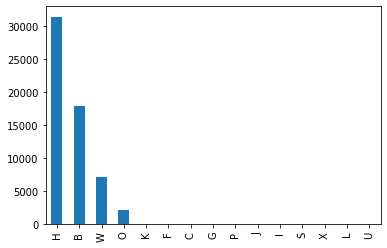

In [24]:
#plotting the arrest based on race in LA
arrest_race.plot(kind = 'bar', )

<Axes: >

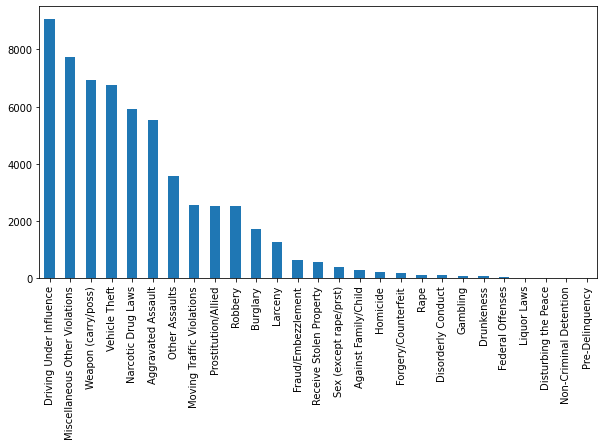

In [25]:
# various crime committed as describe in the data

df_arrest['grp_description'].value_counts().plot(kind = 'bar', figsize = (10, 5))

In [26]:
# check the uniqueness of the arrest_id

df_arrest['rpt_id'].unique()

array(['6369599', '6119431', '6270449', ..., '6390834', '6232867',
       '6413376'], dtype=object)

In [27]:
# check the uniqueness of the arrest_describe

df_arrest['grp_description'].unique()

array(['Robbery', 'Aggravated Assault', 'Burglary',
       'Driving Under Influence', 'Narcotic Drug Laws',
       'Moving Traffic Violations', 'Other Assaults',
       'Miscellaneous Other Violations', 'Prostitution/Allied',
       'Vehicle Theft', 'Weapon (carry/poss)', 'Rape', 'Larceny',
       'Against Family/Child', 'Receive Stolen Property',
       'Fraud/Embezzlement', 'Sex (except rape/prst)', 'Homicide',
       'Disorderly Conduct', 'Forgery/Counterfeit', 'Drunkeness',
       'Federal Offenses', 'Disturbing the Peace', 'Liquor Laws',
       'Gambling', 'Pre-Delinquency', 'Non-Criminal Detention'],
      dtype=object)

In [28]:
# selecting all arrest in 2020

df_2020 = df_arrest[df_arrest['year'] == 2020]

In [29]:
df_2020.sample()

area    rd   location bkg_time area_desc descent_cd  arst_date  \
121312   09  0923  SEPULVEDA     1857  Van Nuys          H 2020-08-15   

       chrg_grp_cd                   dispo_desc grp_description  ...  \
121312          08  MISDEMEANOR COMPLAINT FILED  Other Assaults  ...   

             lon  time                                  chrg_desc bkg_loc_cd  \
121312 -118.4662  1700  BATTERY TRANSPORTATION PERSONNEL/PASSENGR       4279   

            lat                     geometry       date  year   month  \
121312  34.1867  POINT (-118.46620 34.18670) 2020-08-15  2020  August   

             day  
121312  Saturday  

[1 rows x 29 columns]

In [30]:
#grouping the date under arrest description and month

df_month = df_arrest.groupby(['month', 'grp_description']).count()[['rpt_id']]

In [31]:
df_month

rpt_id
month     grp_description                
April     Against Family/Child         27
          Aggravated Assault          529
          Burglary                    157
          Disorderly Conduct            7
          Driving Under Influence     775
...                                   ...
September Receive Stolen Property      42
          Robbery                     168
          Sex (except rape/prst)       32
          Vehicle Theft               501
          Weapon (carry/poss)         458

[294 rows x 1 columns]

In [32]:
#flatting the multi- index

df_flat = df_month.reset_index()

In [33]:
#graphic visualization of all arrest reported in all the months in 2020

px.bar(df_flat, x = 'month', y = 'rpt_id', color = 'grp_description')

In [34]:
#subsetting the dataset for 2020

df_2020_arrest = df_2020[['month', 'age', 'descent_cd', 'grp_description', 'lat', 'lon']].copy()

In [35]:
df_2020_arrest

month age descent_cd                 grp_description      lat  \
627         April  23          B             Weapon (carry/poss)  33.9327   
990       October  35          W                        Burglary  34.2012   
1420         July  24          O                         Robbery  34.1794   
1913     December  62          H         Driving Under Influence  33.7945   
2476      October  60          B  Miscellaneous Other Violations  34.1018   
...           ...  ..        ...                             ...      ...   
172185   November  54          B                        Burglary  33.9092   
172721  September  25          H              Fraud/Embezzlement  34.1034   
172791    October  42          H  Miscellaneous Other Violations  33.9572   
172925   December  42          B              Aggravated Assault  34.0400   
173135        May  27          B                   Vehicle Theft  33.9201   

             lon  
627    -118.2351  
990    -118.4312  
1420   -118.4312  
1913   -118.2437  
2476   -118.3006  
...          ...  
172185 -118.2827  
172721 -118.3325  
172791 -118.3962  
172925 -118.2916  
173135 -118.2868  

[22622 rows x 6 columns]

In [36]:
# Load Kepler.gl with an empty map
from keplergl import KeplerGl
map = KeplerGl(height = 600, width=800)

# Display map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [39]:
map .add_data(data = df_2020_arrest, name = 'arrest')

# Display map
map.show()

<IPython.core.display.Javascript object>

In [45]:
 map.save_to_html(file_name='LAcrime.html')

Map saved to LAcrime.html!
